In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.linalg import svd
import numpy as np
import matplotlib.patches as mpatches
from wordcloud import WordCloud
import plotly.express as px
import re

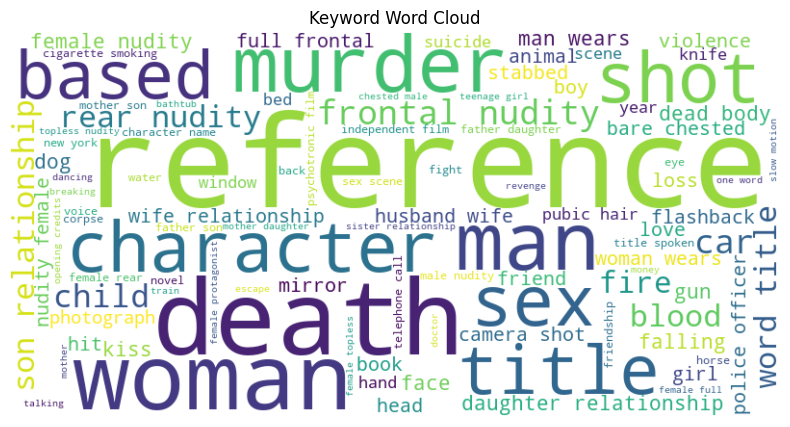

In [27]:
# Load the dataset
file_path = "./European_data_2000.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Convert columns to appropriate data types
df["releaseYear"] = df["releaseYear"].astype("Int64")
df["runtimeMinutes"] = df["runtimeMinutes"].astype("Int64")
df["numberOfVotes"] = df["numberOfVotes"].astype("Int64")
df["imdbRating"] = df["imdbRating"].astype(float)

# Ensure 'keywords' column is string type and handle NaN values
df["keywords"] = df["keywords"].fillna("").astype(str)

# Filter movies with IMDb rating over 7
high_rated_df = df[df["imdbRating"] > 7]

# Combine all keywords into a single string
all_keywords = " ".join(df["keywords"])

# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",
    colormap="viridis",
    max_words=100
).generate(all_keywords)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Keyword Word Cloud")
plt.show()

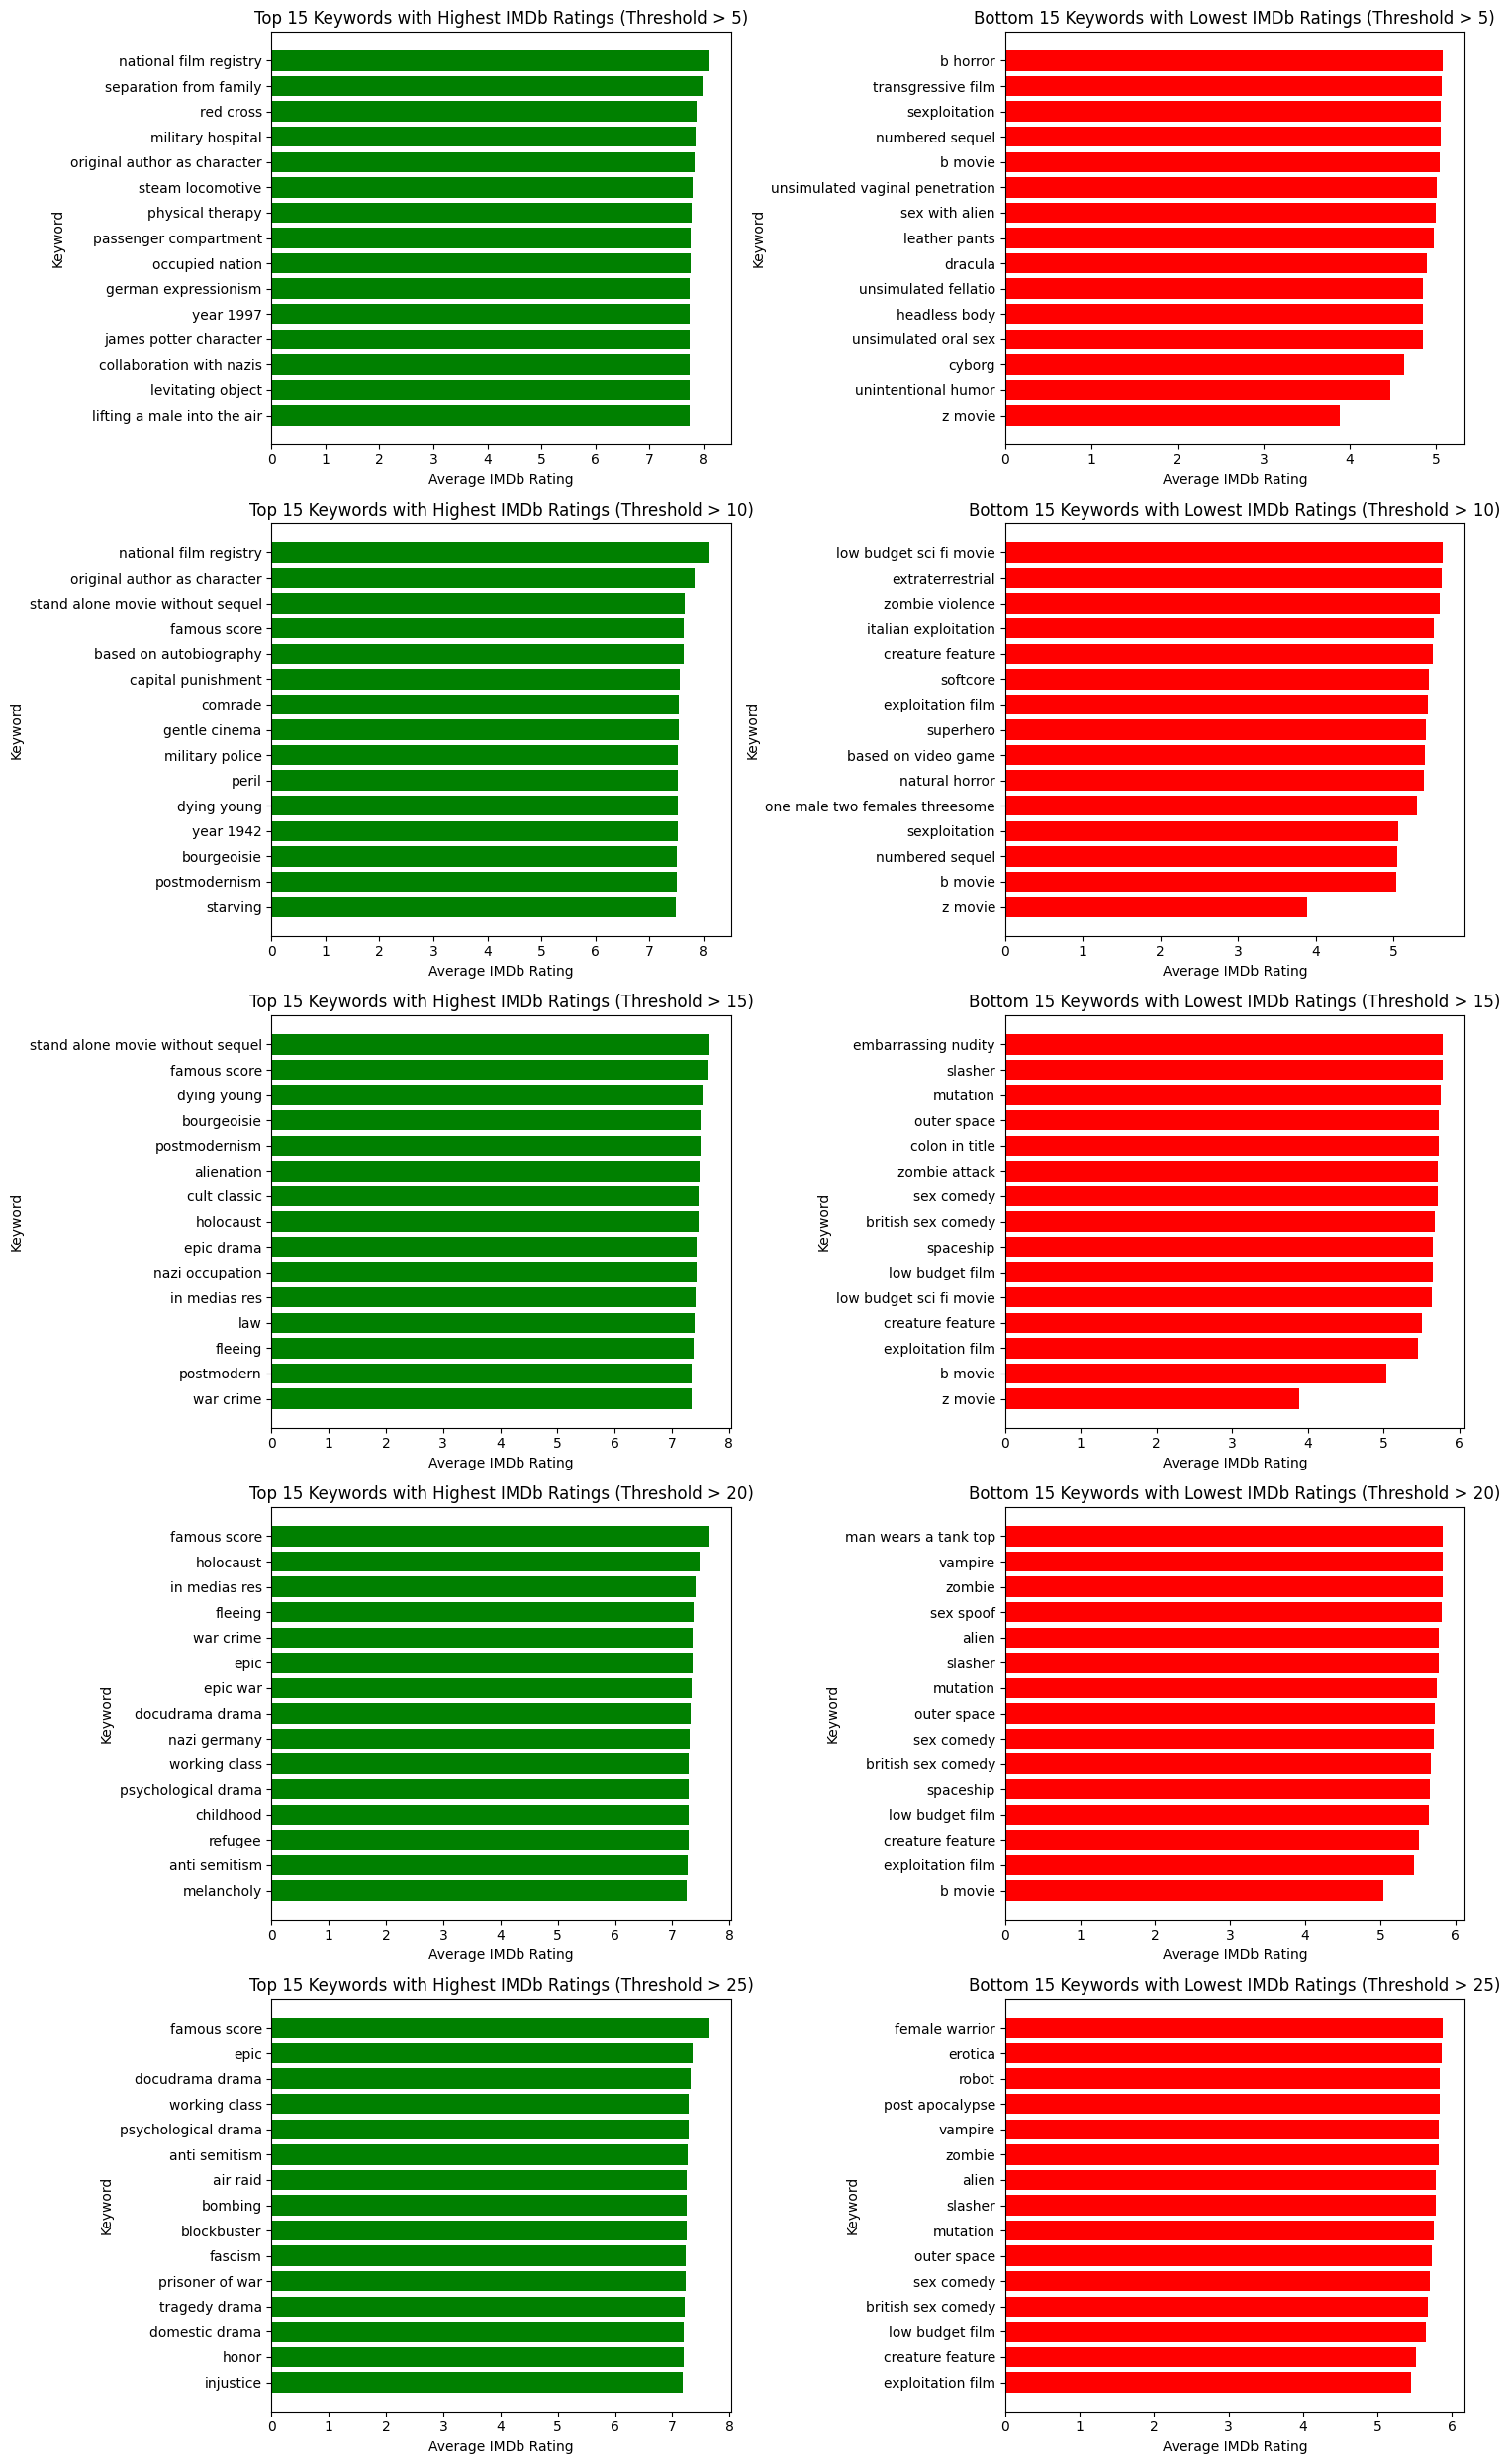

In [43]:
from collections import defaultdict

# Create a dictionary to store keyword ratings
keyword_ratings = defaultdict(list)

# Iterate through each row and assign IMDb rating to its keywords
for _, row in df.iterrows():
    keywords = row["keywords"].split(", ")  # Split keywords into a list
    for keyword in keywords:
        keyword_ratings[keyword].append(row["imdbRating"])

# Define thresholds for filtering keywords
thresholds = [5, 10, 15, 20, 25]

# Create subplots for multiple plots
fig, axes = plt.subplots(len(thresholds), 2, figsize=(15, 5 * len(thresholds)))

for i, threshold in enumerate(thresholds):
    # Calculate the average IMDb rating for each keyword
    keyword_avg_ratings = {k: sum(v) / len(v) for k, v in keyword_ratings.items() if len(v) > threshold}

    # Convert to DataFrame and sort by rating
    keyword_df = pd.DataFrame(keyword_avg_ratings.items(), columns=["Keyword", "Average IMDb Rating"])
    keyword_df = keyword_df.sort_values(by="Average IMDb Rating", ascending=False)

    # Display top and bottom 15 keywords
    top_keywords = keyword_df.head(15)
    bottom_keywords = keyword_df.tail(15)

    # Plot top 15 keywords
    ax_top = axes[i, 0]
    ax_top.barh(top_keywords["Keyword"], top_keywords["Average IMDb Rating"], color="green")
    ax_top.set_xlabel("Average IMDb Rating")
    ax_top.set_ylabel("Keyword")
    ax_top.set_title(f"Top 15 Keywords with Highest IMDb Ratings (Threshold > {threshold})")
    ax_top.invert_yaxis()  # Invert y-axis for better readability

    # Plot bottom 15 keywords
    ax_bottom = axes[i, 1]
    ax_bottom.barh(bottom_keywords["Keyword"], bottom_keywords["Average IMDb Rating"], color="red")
    ax_bottom.set_xlabel("Average IMDb Rating")
    ax_bottom.set_ylabel("Keyword")
    ax_bottom.set_title(f"Bottom 15 Keywords with Lowest IMDb Ratings (Threshold > {threshold})")
    ax_bottom.invert_yaxis()  # Invert y-axis for better readability

# Adjust layout and display plots
plt.tight_layout()
plt.show()


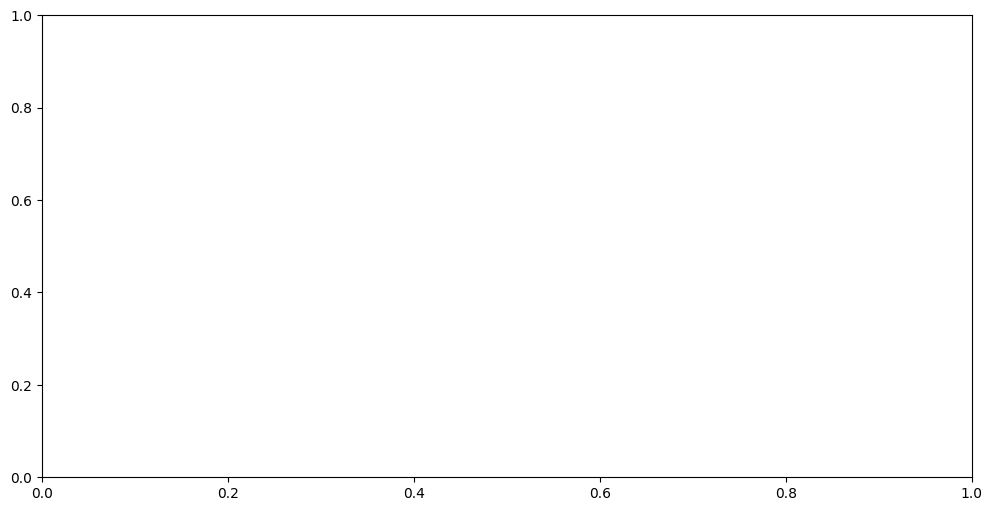

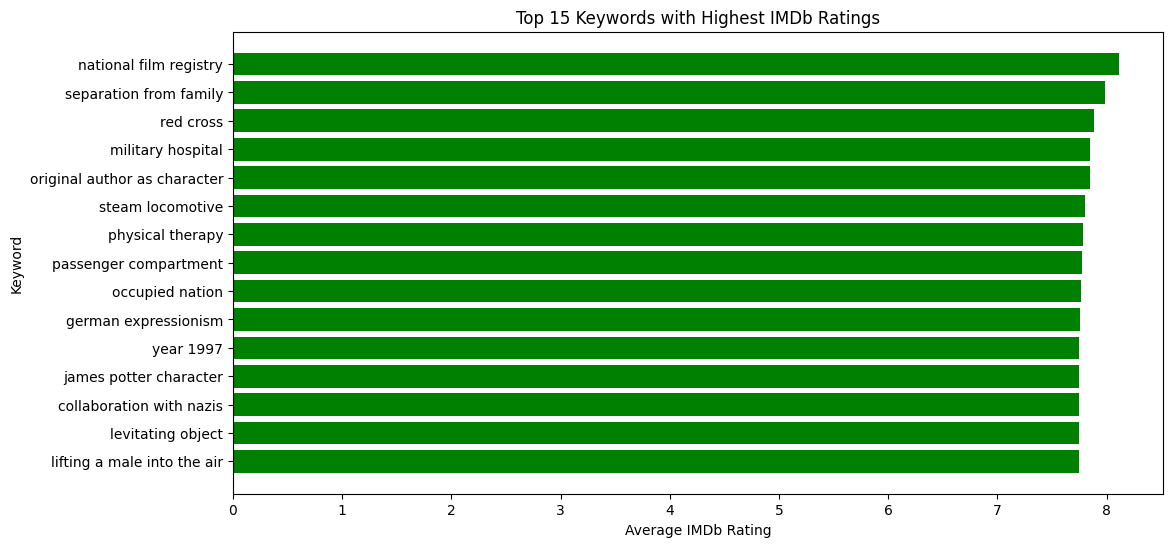

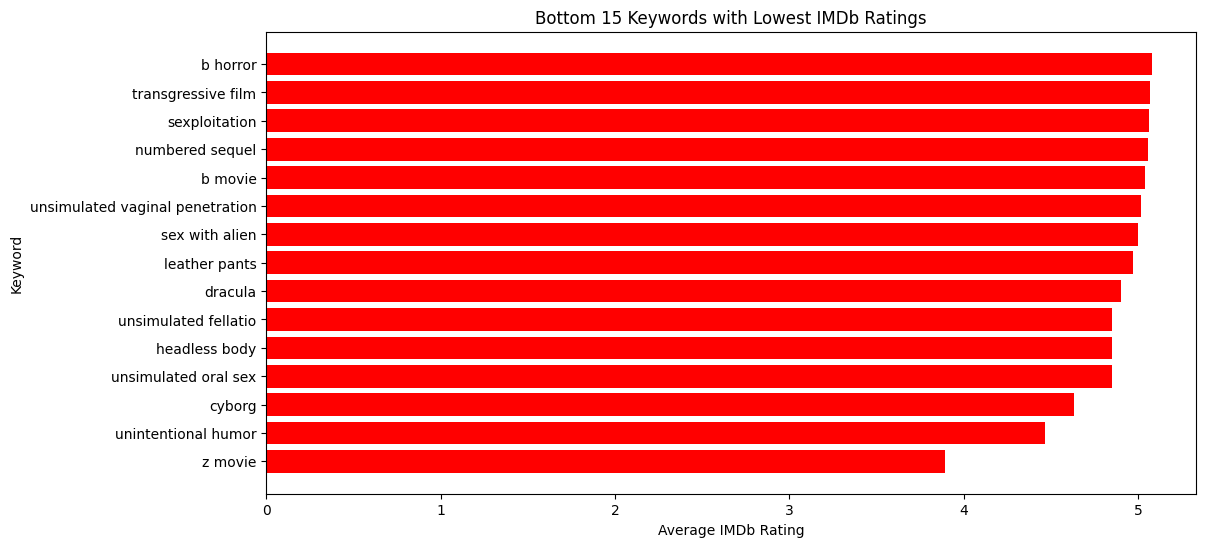

In [41]:
# Create bar plots for top and bottom 15 keywords
fig, ax = plt.subplots(figsize=(12, 6))

# Plot top 15 keywords
plt.figure(figsize=(12, 6))
plt.barh(top_keywords["Keyword"], top_keywords["Average IMDb Rating"], color="green")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Keyword")
plt.title("Top 15 Keywords with Highest IMDb Ratings")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Plot bottom 15 keywords
plt.figure(figsize=(12, 6))
plt.barh(bottom_keywords["Keyword"], bottom_keywords["Average IMDb Rating"], color="red")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Keyword")
plt.title("Bottom 15 Keywords with Lowest IMDb Ratings")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [26]:
# Load datasets (update paths as necessary)
box_df = pd.read_csv("enhanced_box_office_data(2000-2024)u.csv")  # Dataset with 'Release Group'
main_df = pd.read_csv("European_data_2000.csv")      # Dataset with 'originalTitle'

# Clean up the title columns:
# - Remove any double quotes from the 'Release Group' in the box office dataset.
# - Strip leading/trailing whitespace and convert to lowercase in both datasets.
box_df["Release Group"] = (
    box_df["Release Group"].str.replace('"', '', regex=False)
    .str.strip()
    .str.lower()
)
main_df["originalTitle"] = (
    main_df["originalTitle"].str.replace('"', '', regex=False)
    .str.strip()
    .str.lower()
)

# Merge datasets on the cleaned title columns.
merged_df = pd.merge(
    main_df, box_df,
    left_on="originalTitle", right_on="Release Group",
    how="inner"  # Use inner join to only keep movies present in both datasets.
)

print("Check if the merge was successful:")
# Verify the merge by checking a known title, e.g., "my week with marilyn"
print(merged_df[merged_df["originalTitle"].str.contains("my week with marilyn")])

# Now I want to print all originalTitle of each movie in the merged_df
print("The movies are: ")
print(merged_df["originalTitle"])

Check if the merge was successful:
      titleId                                imdbUrl         originalTitle  \
69  tt1655420  https://www.imdb.com/title/tt1655420/  my week with marilyn   

   titleType  releaseYear  runtimeMinutes  isAdult  imdbRating  numberOfVotes  \
69     movie       2011.0            99.0    False         6.9        90282.0   

   allCountries  ...   $Domestic Domestic %    $Foreign Foreign %  Year  \
69       GB, US  ...  14600347.0       41.6  20457349.0      58.4  2011   

            Genres    Rating Vote_Count Original_Language  \
69  Drama, Romance  6.681/10     1284.0                en   

                        Production_Countries  
69  United Kingdom, United States of America  

[1 rows x 36 columns]
The movies are: 
0                           inferno
1                       man on fire
2                 the great escaper
3                               men
4      the girl in the spider's web
                   ...             
358                  